## Sumbit example

In [10766]:
import pandas as pd
import numpy as np

In [10767]:
DATA_PATH = "/home/arnemkova/ML_labs/lab2/train.csv"

Посмотрим на табличку)

In [10768]:
train_df = pd.read_csv(DATA_PATH)
test_df = pd.read_csv("/home/arnemkova/ML_labs/lab2/test.csv")

train_df.head()

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
0,6622,ecom,6488536.0,NaN,0,82221,0,0,18.450527,0.461750,2020-04-21 16:04:41.817367072
1,2047,information_source,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,2024-07-19 23:50:07.268931816
2,1118,information_source,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,2024-07-13 16:35:54.794883135
3,4992,news,89534.0,924.0,0,834,0,0,2.149243,-0.093360,2024-09-10 21:29:14.006315095
4,9970,information_source,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303,2024-05-26 11:07:15.950527838


Теперь посмотрим чё там по данным внутри

In [10769]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             8000 non-null   int64  
 1   category               8000 non-null   object 
 2   clicks                 7727 non-null   float64
 3   likes                  7624 non-null   float64
 4   buys                   8000 non-null   int64  
 5   4xx_errors             8000 non-null   int64  
 6   5xx_errors             8000 non-null   int64  
 7   complaints_count       7527 non-null   object 
 8   average_dwelltime      8000 non-null   float64
 9   source_attractiveness  8000 non-null   float64
 10  date_of_registration   8000 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 687.6+ KB


Посмотрим на статические характеристики

In [10770]:
train_df.describe()

,Unnamed: 0,clicks,likes,buys,4xx_errors,5xx_errors,average_dwelltime,source_attractiveness
count,8000.000000,7.727000e+03,7.624000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8000.000000,8000.000000
mean,5006.138875,2.749785e+06,5.985027e+05,5.810509e+05,8.204958e+04,2.769224e+04,6.979549,0.191997
std,2893.886162,4.699120e+06,1.978345e+06,2.262221e+06,1.555219e+05,7.946935e+04,10.004924,0.227873
min,0.000000,5.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,-0.681718
25%,2493.250000,3.599210e+05,0.000000e+00,0.000000e+00,2.943000e+03,0.000000e+00,1.503928,0.038220
50%,5035.000000,1.097221e+06,3.399550e+04,0.000000e+00,2.671750e+04,0.000000e+00,4.022802,0.154256
75%,7521.250000,2.915358e+06,2.860638e+05,0.000000e+00,9.500225e+04,2.016375e+04,8.899400,0.282510
max,9999.000000,6.203206e+07,5.582181e+07,4.277391e+07,2.904996e+06,1.865588e+06,211.218066,1.355736


Имеется столбец "Unnemed: 0" он нам не нужен - дропаем его

In [10771]:
train_df = train_df.drop("Unnamed: 0", axis=1)

Посмотрим колличество пропусков

In [10772]:
train_df.isnull().sum()

category                   0
clicks                   273
likes                    376
buys                       0
4xx_errors                 0
5xx_errors                 0
complaints_count         473
average_dwelltime          0
source_attractiveness      0
date_of_registration       0
dtype: int64

Видим, что столбцы "clicks", "likes" содержат NaN значения, а столбец "complaints_count" содержит значения "-". Удалим их.

In [10773]:
train_df["complaints_count"] = train_df["complaints_count"].replace("-", np.nan)
train_df["complaints_count"] = pd.to_numeric(train_df["complaints_count"])
train_df["average_dwelltime"] = train_df["average_dwelltime"].replace(-1, np.nan)

test_df["complaints_count"] = test_df["complaints_count"].replace("-", np.nan)
test_df["complaints_count"] = pd.to_numeric(test_df["complaints_count"])
test_df["average_dwelltime"] = test_df["average_dwelltime"].replace(-1, np.nan)

numeric_columns = ["clicks", "likes", "buys", "4xx_errors", "complaints_count", "average_dwelltime"]
#train_df[numeric_columns] = train_df[numeric_columns].fillna(train_df[numeric_columns].median())
test_df[numeric_columns] = test_df[numeric_columns].fillna(test_df[numeric_columns].median())
train_df = train_df.dropna()

Приведем все к целочисленному типу.

In [10774]:
train_df["clicks"] = train_df["clicks"].astype(np.int64)
train_df["likes"] = train_df["likes"].astype(np.int64)
train_df["complaints_count"] = train_df["complaints_count"].astype(np.int64)

test_df["clicks"] = test_df["clicks"].astype(np.int64)
test_df["likes"] = test_df["likes"].astype(np.int64)
test_df["complaints_count"] = test_df["complaints_count"].astype(np.int64)

In [10775]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6229 entries, 1 to 7998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               6229 non-null   object 
 1   clicks                 6229 non-null   int64  
 2   likes                  6229 non-null   int64  
 3   buys                   6229 non-null   int64  
 4   4xx_errors             6229 non-null   int64  
 5   5xx_errors             6229 non-null   int64  
 6   complaints_count       6229 non-null   int64  
 7   average_dwelltime      6229 non-null   float64
 8   source_attractiveness  6229 non-null   float64
 9   date_of_registration   6229 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 535.3+ KB


Преобразуем столбец "date_of_registration", пострим из него признак, отвечающий за возраст домена

In [10776]:
train_df["date_of_registration"] = pd.to_datetime(train_df["date_of_registration"])
train_df["domen_age"] = (pd.Timestamp('now') - train_df["date_of_registration"]) / pd.Timedelta(days=365)
train_df = train_df.drop("date_of_registration", axis=1)

test_df["date_of_registration"] = pd.to_datetime(test_df["date_of_registration"])
test_df["domen_age"] = (pd.Timestamp('now') - test_df["date_of_registration"]) / pd.Timedelta(days=365)
test_df = test_df.drop("date_of_registration", axis=1)

Преобразуем категориальные переменные

In [10777]:
train_df["category"].unique()

array(['information_source', 'news', 'porn', 'ecom', 'social'],
      dtype=object)

In [10778]:
train_df = pd.get_dummies(train_df, columns=["category"], drop_first=True)
test_df = pd.get_dummies(test_df, columns=["category"], drop_first=True)

In [10779]:
train_df.head()

,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,domen_age,category_information_source,category_news,category_porn,category_social
1,874840,21100,0,12872,0,0,10.721619,-0.022317,0.229666,True,False,False,False
2,571210,94707,0,0,7420,0,1.922243,0.046396,0.246930,True,False,False,False
3,89534,924,0,834,0,0,2.149243,-0.093360,0.084728,False,True,False,False
4,1043953,289288,0,58375,20260,3948,3.764965,0.027303,0.379062,True,False,False,False
6,99712,0,0,0,15178,3725,20.786928,0.063572,1.464616,False,False,True,False


In [10780]:
import matplotlib.pyplot as plt
import seaborn as sns

Посмотрим на распределение привлекательности

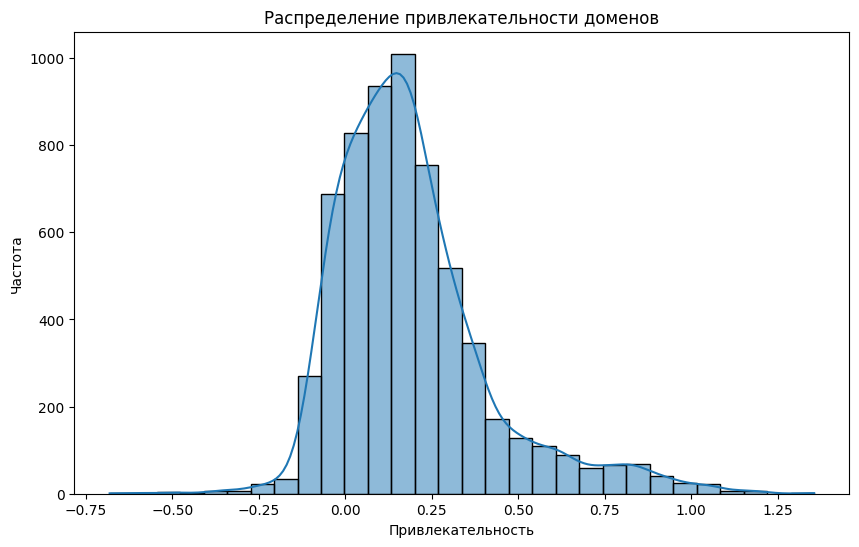

In [10781]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df["source_attractiveness"], bins=30, kde=True)
plt.title("Распределение привлекательности доменов")
plt.xlabel("Привлекательность")
plt.ylabel("Частота")
plt.show()

Построим корреляционную матрицу

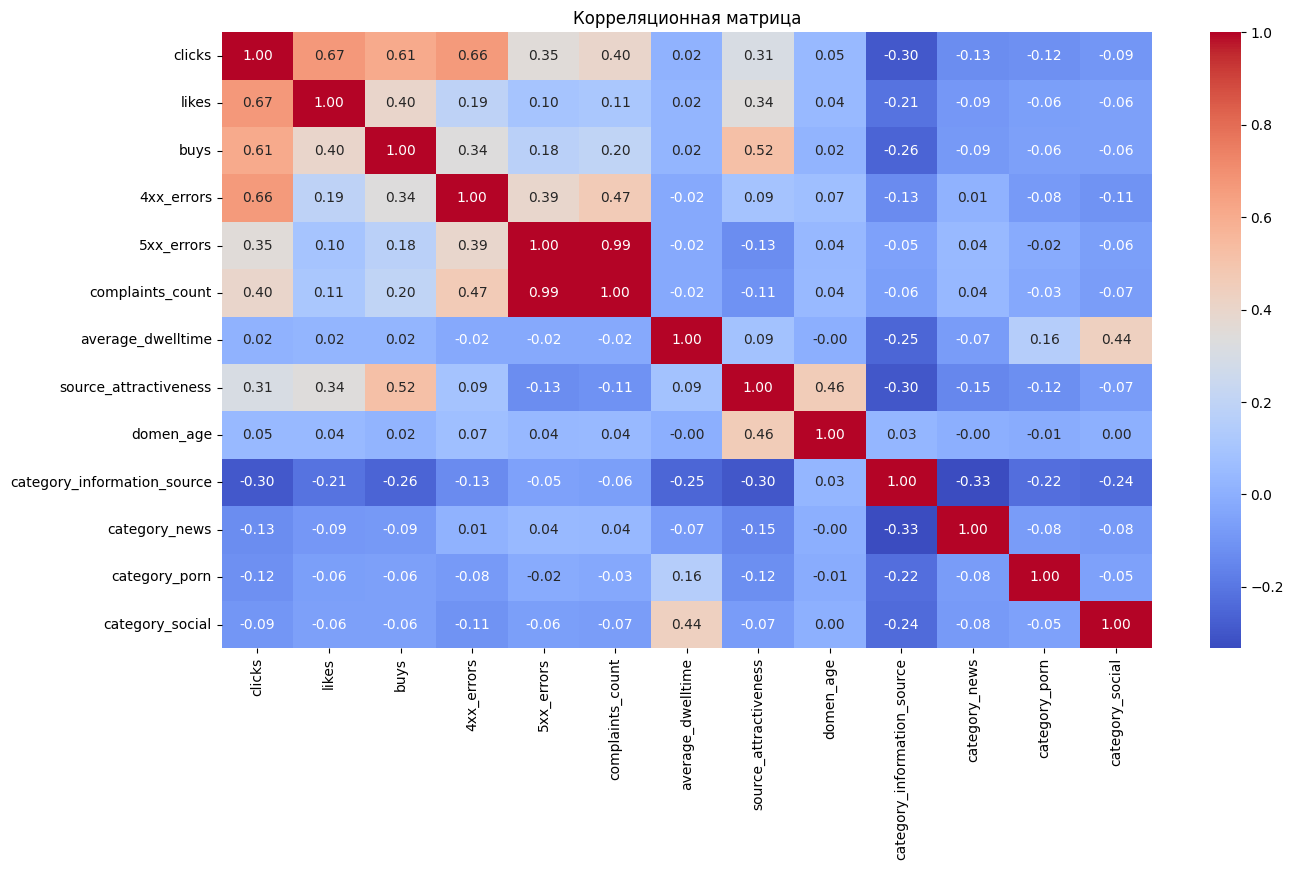

In [10782]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Корреляционная матрица")
plt.show()

Удалим признаки с высокой корреляцией

In [10783]:
threshold = 0.9

corr_matrix = train_df.corr()

high_corr_pairs = corr_matrix[(corr_matrix > threshold) & (corr_matrix != 1.0)].stack()

print("Признаки с высокой корреляцией:")
print(high_corr_pairs)

Признаки с высокой корреляцией:
5xx_errors        complaints_count    0.99494
complaints_count  5xx_errors          0.99494
dtype: float64


In [10784]:
# test_df.drop("5xx_errors", axis=1, inplace=True)

# train_df.drop("5xx_errors", axis=1, inplace=True)

In [10785]:
# train_df.drop("registration_day", axis=1, inplace=True)
# train_df.drop("registration_month", axis=1, inplace=True)
# train_df.drop("registration_minute", axis=1, inplace=True)

# test_df.drop("registration_day", axis=1, inplace=True)
# test_df.drop("registration_month", axis=1, inplace=True)
# test_df.drop("registration_minute", axis=1, inplace=True)

Посмотри на зависимость привлекательности домена от различных признаков

<Figure size 1200x800 with 0 Axes>

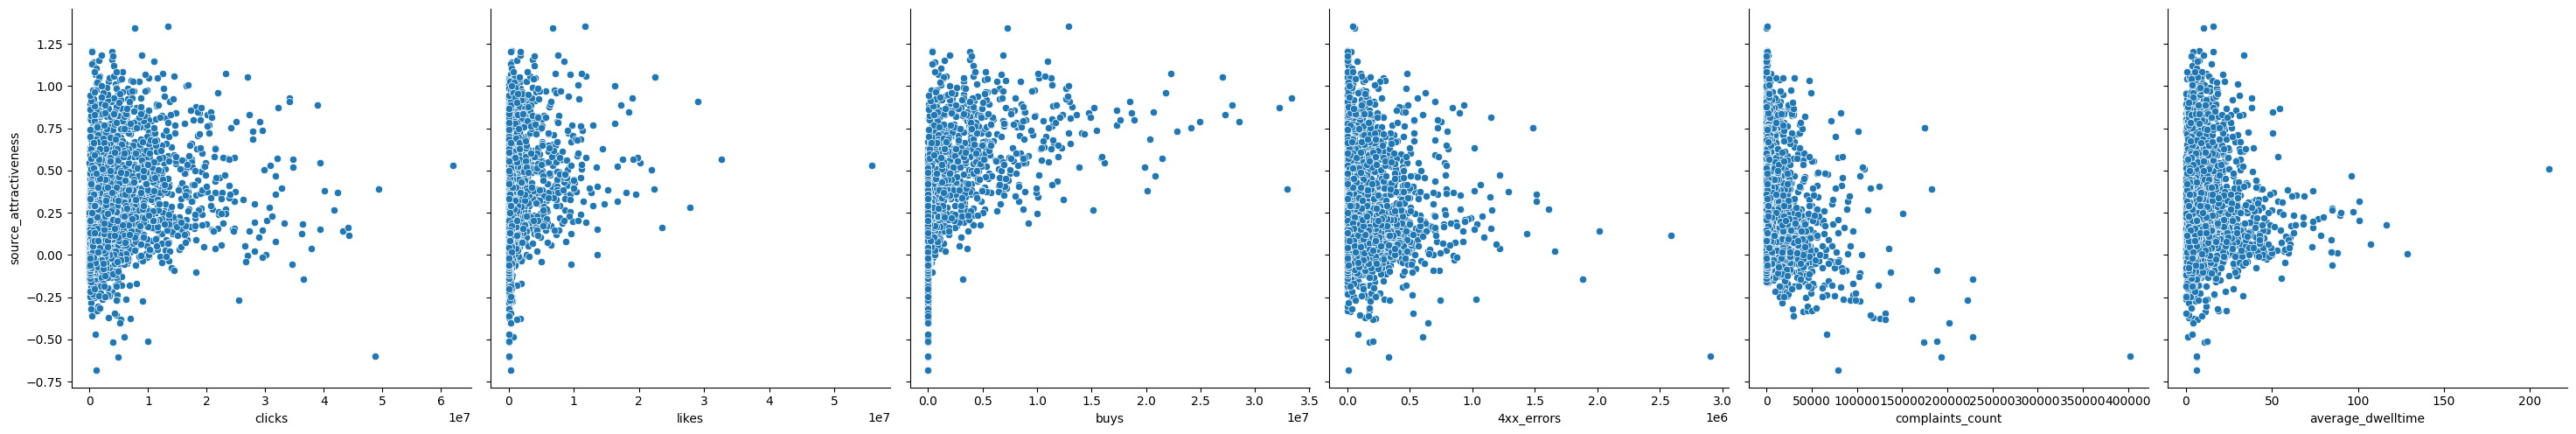

In [10786]:
plt.figure(figsize=(12, 8))
sns.pairplot(train_df, x_vars=["clicks", "likes", "buys", "4xx_errors", "complaints_count", "average_dwelltime"], y_vars=["source_attractiveness"], height=5)
plt.show()

Посмотрим на распределения признаков

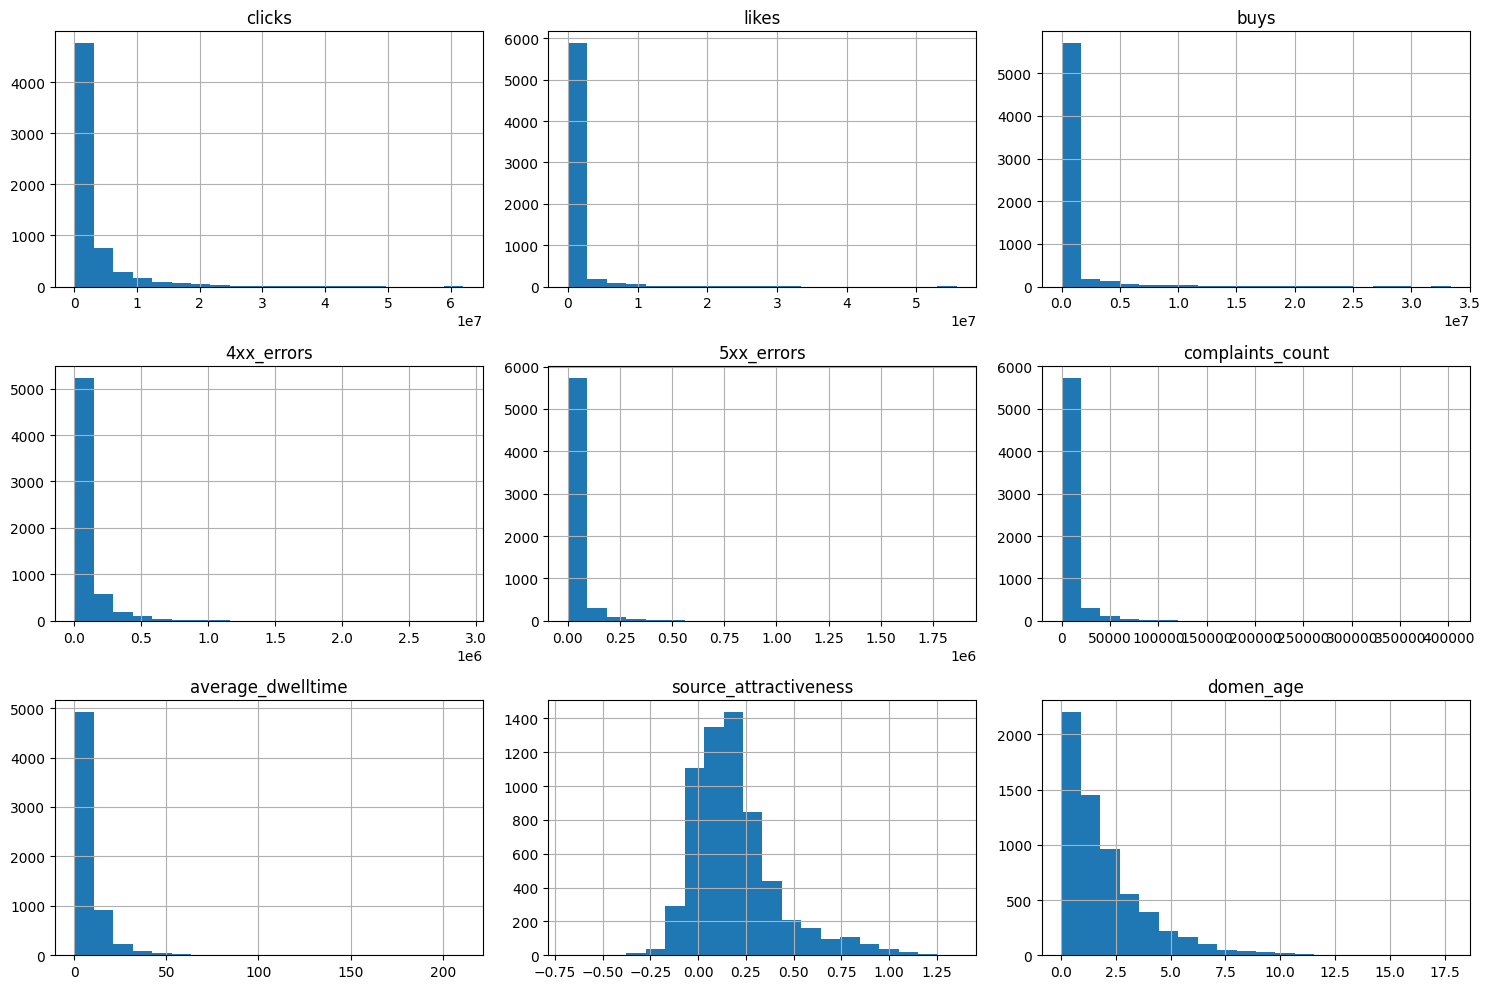

In [10787]:
train_df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

Нормализуем признаки

In [10788]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [10789]:
train_df[numeric_columns] = np.log1p(train_df[numeric_columns])
test_df[numeric_columns] = np.log1p(test_df[numeric_columns])

scaler = StandardScaler()
train_df[numeric_columns] = scaler.fit_transform(train_df[numeric_columns])
test_df[numeric_columns] = scaler.fit_transform(test_df[numeric_columns])

# Нормализация "domen_age"
train_df["domen_age"] = np.log1p(train_df[["domen_age"]])
test_df["domen_age"] = np.log1p(test_df[["domen_age"]])

train_df["domen_age"] = scaler.fit_transform(train_df[["domen_age"]])
test_df["domen_age"] = scaler.fit_transform(test_df[["domen_age"]])

Посмотрим на распределения признаков после нормализации

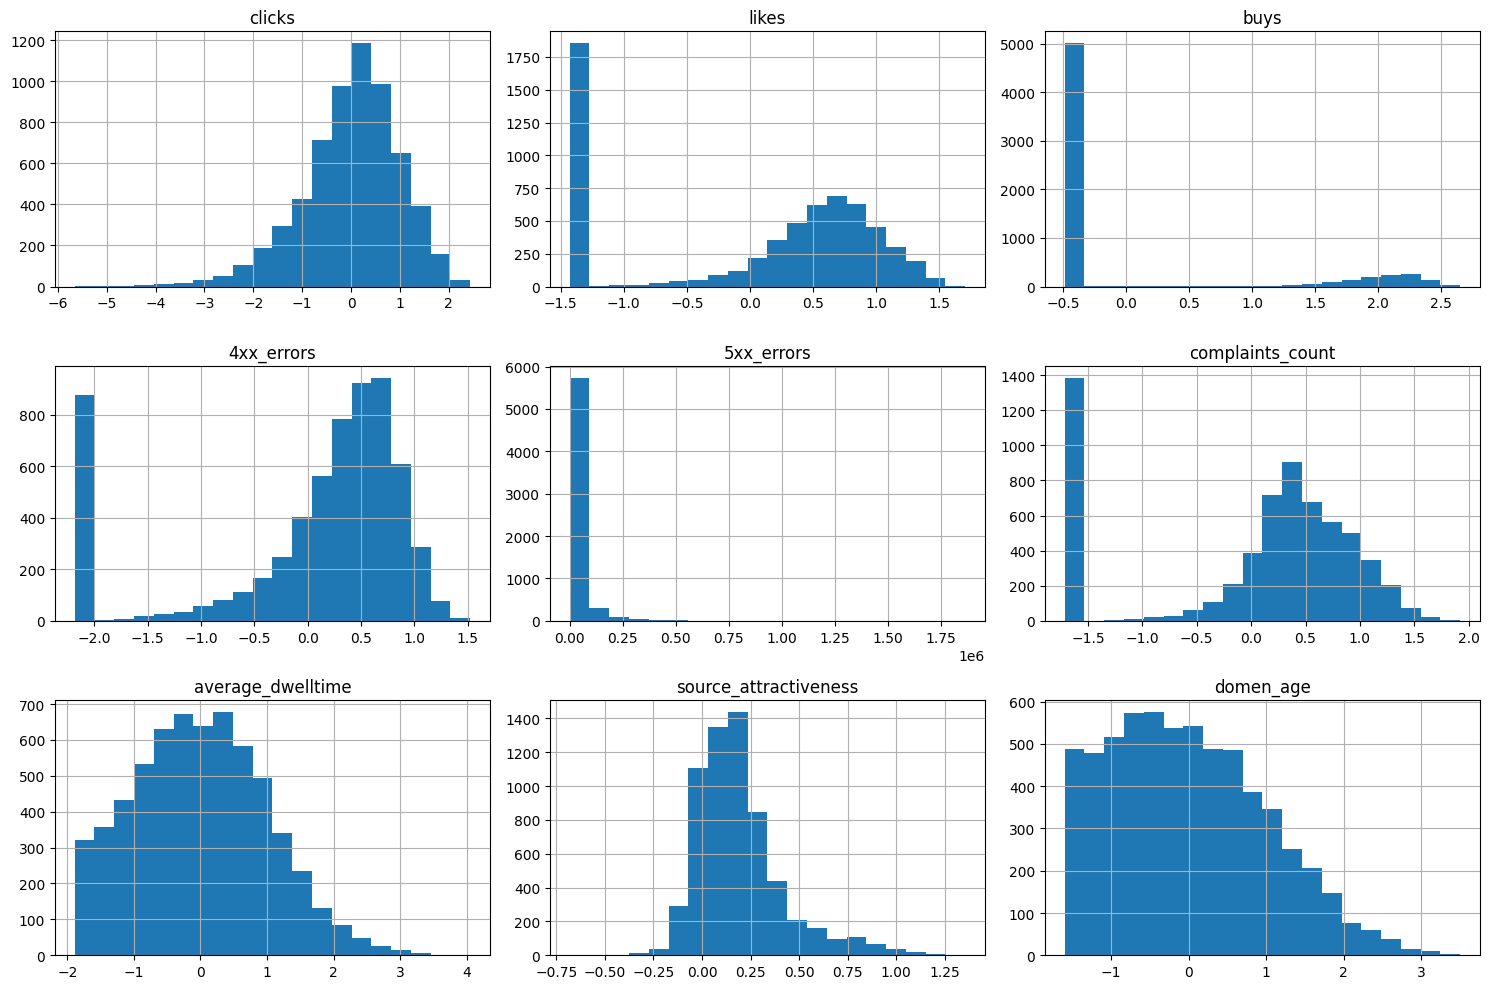

In [10790]:
train_df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

Посмотрим на выбросы

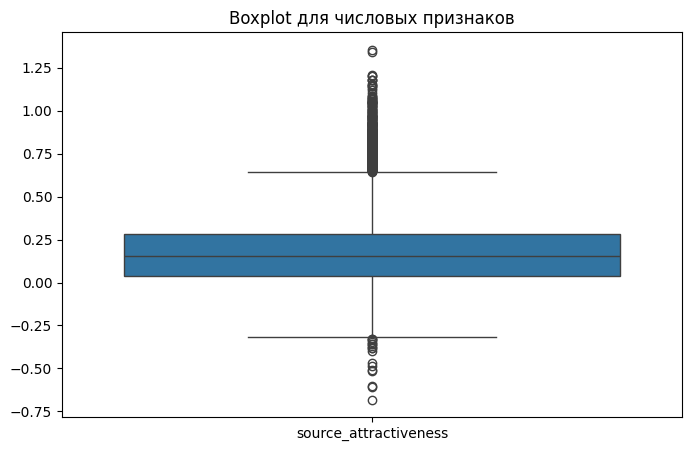

In [10791]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_df[["source_attractiveness"]])
plt.title("Boxplot для числовых признаков")
plt.show()


Удалим выбросы

In [10792]:
Q1 = train_df["source_attractiveness"].quantile(0.25)
Q3 = train_df["source_attractiveness"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


#train_df = train_df[(train_df["source_attractiveness"] >= lower_bound) & (train_df["source_attractiveness"] <= upper_bound)]

Снова посмотрим на выбросы

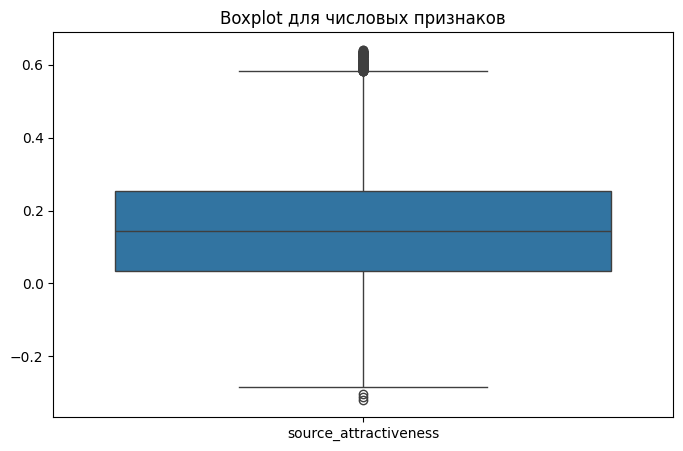

In [10793]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_df[["source_attractiveness"]])
plt.title("Boxplot для числовых признаков")
plt.show()


In [10794]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, cross_val_score

Разделим на тестовую и обучающую выборки

In [10795]:
X = train_df.drop("source_attractiveness", axis=1)
y = train_df["source_attractiveness"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
)

Теперь приступим к обучению

Подборка гиперпараметров

In [10796]:
param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 1.0, 10.0, 100.0]}
param_grid_elasticnet = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 1.0, 10.0, 100.0], 'l1_ratio': [0.5, 0.8, 1.0]}

In [10797]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error'),
    "Lasso": GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error'),
    "Elastic Net": GridSearchCV(ElasticNet(), param_grid_elasticnet, cv=5, scoring='neg_mean_squared_error')
}

In [10798]:
cv_scores = cross_val_score(models["Linear Regression"], X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Средний MSE на кросс-валидации: {-cv_scores.mean()}')

Средний MSE на кросс-валидации: 0.005642109018096099


In [10799]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Оценка на тренировочных данных
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    # Оценка на тестовых данных
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    if hasattr(model, 'best_params_'):
        print(f'{model_name}: Лучшие параметры: {model.best_params_}, CV MSE = {-model.best_score_}')
    
    print(f"{model_name} - Training set: MSE = {mse_train}, R^2 = {r2_train}")
    print(f"{model_name} - Test set: MSE = {mse_test}, R^2 = {r2_test}\n")

Linear Regression - Training set: MSE = 0.005605435966383053, R^2 = 0.7946142688768633
Linear Regression - Test set: MSE = 0.005889637751380987, R^2 = 0.7763202617187684

Ridge: Лучшие параметры: {'alpha': 1.0}, CV MSE = 0.00564208529955648
Ridge - Training set: MSE = 0.005605471768185764, R^2 = 0.7946129570824785
Ridge - Test set: MSE = 0.005891095483049974, R^2 = 0.776264899224169

Lasso: Лучшие параметры: {'alpha': 1e-05}, CV MSE = 0.005642166796406349
Lasso - Training set: MSE = 0.0056054551689266345, R^2 = 0.7946135652869059
Lasso - Test set: MSE = 0.005890548750624333, R^2 = 0.7762856633137514

Elastic Net: Лучшие параметры: {'alpha': 1e-05, 'l1_ratio': 0.5}, CV MSE = 0.005642132146024965
Elastic Net - Training set: MSE = 0.005605441388283277, R^2 = 0.7946140702159655
Elastic Net - Test set: MSE = 0.005890123058660405, R^2 = 0.7763018304654675



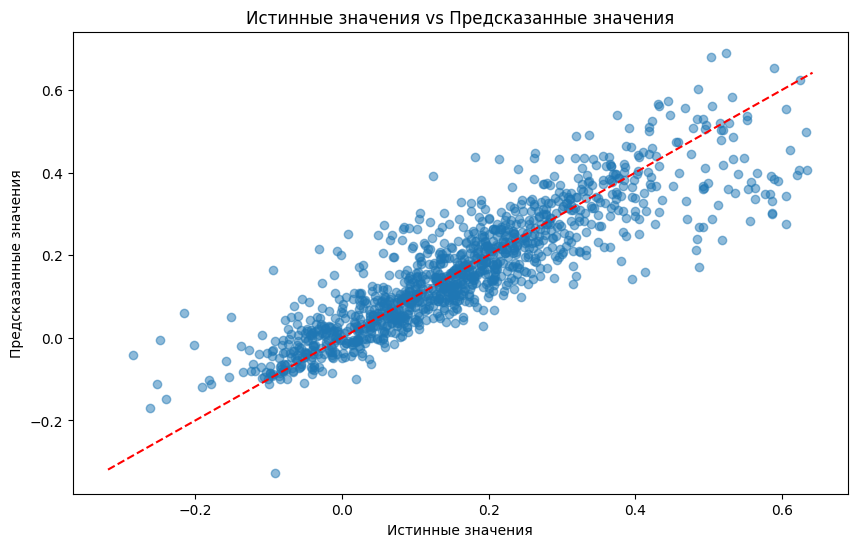

In [10800]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Истинные значения vs Предсказанные значения')
plt.show()

## Final model submit function

Принимает на вход путь к набору данных в формате `.csv`

На выходе получается файл с предиктами в формате `.csv`

Пример содержания:
```
0.432
0.412
0.312
```

Реализация модели - между ними

In [10801]:
X = test_df.drop(columns=['ID'], axis=1)


predicts = models["Ridge"].predict(X)

data = {
    " source_attractiveness": predicts
}
submit = pd.DataFrame(data)
submit.to_csv('submission.csv', index_label="ID")

In [10802]:
predicted_df1 = pd.read_csv('/home/arnemkova/ML_labs/lab2/possible_true_values.csv')


mse_test1 = mean_squared_error(predicts, predicted_df1["Possible True Values (Upper)"])

print(mse_test1)

0.010883379354736145
